In [5]:
%pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [9]:
data=load_breast_cancer.load_breast_cancer() # Loading the breast cancer dataset from sklearn
df = pd.DataFrame(data.data, columns=data.feature_names) # Creating a dataframe with feature names as columns

In [10]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:

x=pd.DataFrame(data.data, columns=data.feature_names) # Features
y=pd.Series(data.target) # Labels

In [12]:
x.shape # It shows how many features are there in the dataset.

(569, 30)

In [13]:
y.shape # It shows how many labels are there in the dataset.

(569,)

In [14]:
y.value_counts() # It tells how many malignant and benign cases are there in the dataset.

1    357
0    212
Name: count, dtype: int64

In [15]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
x.describe().T[['mean', '50%', 'std', 'min', 'max']].head() # statistical measures od the features

,mean,50%,std,min,max
mean radius,14.127292,13.37000,3.524049,6.98100,28.1100
mean texture,19.289649,18.84000,4.301036,9.71000,39.2800
mean perimeter,91.969033,86.24000,24.298981,43.79000,188.5000
mean area,654.889104,551.10000,351.914129,143.50000,2501.0000
mean smoothness,0.096360,0.09587,0.014064,0.05263,0.1634


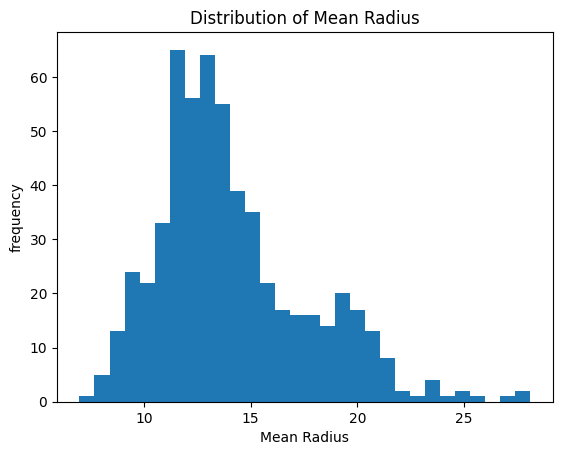

In [ ]:

# Plotting the distribution of 'mean radius' feature
plt.figure()
plt.hist(x['mean radius'], bins=30)
plt.xlabel('Mean Radius')
plt.ylabel('frequency')
plt.title('Distribution of Mean Radius')
plt.show()



In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


x_train shape: (455, 30)
x_test shape: (114, 30)


In [ ]:
x_train[['mean radius', 'mean texture']].describe()|

,mean,50%,std,min,max
mean radius,14.117635,13.30,3.535815,7.691,28.11
mean texture,19.185033,18.68,4.266005,9.710,39.28


In [27]:
scalar = StandardScaler()   

x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [30]:
x_train_scaled=pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [33]:
x_train_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-1.811494e-15,-3.373126e-15,-3.634699e-15,-2.537653e-16,-4.232024e-15,1.011157e-15,9.857804e-16,5.817081e-16,-5.910779e-15,-3.367270e-15,...,1.397661e-15,-8.198570e-17,-8.549937e-16,-2.004746e-15,1.198553e-15,-5.875642e-16,-5.992764e-16,1.093143e-16,5.075305e-16,-2.320000e-15
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-1.819583e+00,-2.223500e+00,-1.809497e+00,-1.365036e+00,-3.100011e+00,-1.607228e+00,-1.119899e+00,-1.269910e+00,-2.345430e+00,-1.776889e+00,...,-1.572438e+00,-2.230887e+00,-1.578174e+00,-1.152259e+00,-2.617938e+00,-1.455995e+00,-1.312795e+00,-1.749805e+00,-2.124261e+00,-1.616973e+00
25%,-6.830930e-01,-7.075360e-01,-6.907613e-01,-6.602049e-01,-7.132037e-01,-7.770872e-01,-7.505387e-01,-7.349048e-01,-7.010461e-01,-7.097920e-01,...,-6.616975e-01,-7.412292e-01,-6.853483e-01,-6.358132e-01,-7.430298e-01,-6.961323e-01,-7.555873e-01,-7.700987e-01,-6.499846e-01,-7.189616e-01
50%,-2.314983e-01,-1.185158e-01,-2.429378e-01,-2.895973e-01,-8.082013e-02,-2.413402e-01,-3.446456e-01,-3.911235e-01,-6.915087e-02,-1.772851e-01,...,-2.632354e-01,-5.210786e-02,-2.829543e-01,-3.357508e-01,-2.741590e-02,-2.753858e-01,-2.304110e-01,-2.386392e-01,-1.236838e-01,-2.135847e-01
75%,4.593426e-01,5.631988e-01,4.884799e-01,3.193386e-01,6.331729e-01,5.281282e-01,5.473870e-01,6.737569e-01,5.354290e-01,4.642225e-01,...,4.525400e-01,6.857059e-01,5.263332e-01,2.724862e-01,6.296478e-01,5.738568e-01,5.383496e-01,7.189995e-01,4.319440e-01,4.600643e-01
max,3.961679e+00,4.715674e+00,3.976811e+00,5.208312e+00,4.864642e+00,3.964311e+00,4.256736e+00,4.022271e+00,4.476124e+00,4.815921e+00,...,4.120889e+00,3.962127e+00,4.322305e+00,5.955420e+00,3.767506e+00,4.424833e+00,4.672828e+00,2.709674e+00,5.917679e+00,4.999482e+00


### Scaling does not change data relationship, it only change units.
### Gradient- based model converge faster when features are on similar scale.

#### Before scaling, features had different ranges, which can bias gradient-based models.StandardScaler normalizes each feature to zero mean and unit variance, ensuring fair contribution during optimization